## Importación modulos y datos

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory=False) 

## Exploración datos

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       303 non-null    int64  
 1   Individuo  303 non-null    int64  
 2   AE         303 non-null    float64
 3   LE         303 non-null    float64
 4   AT         303 non-null    float64
 5   LT         303 non-null    float64
 6   AA         303 non-null    float64
 7   LA         303 non-null    float64
 8   NV         303 non-null    float64
 9   Morfotipo  303 non-null    object 
 10  Labio      303 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 26.2+ KB


In [60]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio
0,96,5,6.14,1.80,13.72,10.00,8.13,6.08,5.12,LU,1
1,96,6,6.54,2.18,11.66,9.21,6.66,4.93,5.47,LU,0
2,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,0
3,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,0
4,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,1


In [61]:
data["Morfotipo"].astype('category')

0      LU
1      LU
2      LU
3      LU
4      LU
       ..
298    LU
299    LB
300    LU
301    LU
302    LB
Name: Morfotipo, Length: 303, dtype: category
Categories (3, object): ['DU', 'LB', 'LU']

In [62]:
data.Morfotipo.value_counts()

LU    260
LB     41
DU      2
Name: Morfotipo, dtype: int64

In [63]:
data.iloc[:,2:-1].describe()

,AE,LE,AT,LT,AA,LA,NV
count,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000
mean,6.121881,1.753729,13.008317,9.63736,7.579802,6.062970,5.119208
std,0.976661,0.361996,1.930308,1.39747,1.215710,0.808302,0.299823
min,3.200000,0.710000,8.050000,6.24000,4.790000,4.270000,4.020000
25%,5.400000,1.485000,11.525000,8.68000,6.670000,5.470000,4.920000
50%,6.110000,1.760000,12.850000,9.55000,7.460000,5.970000,5.160000
75%,6.810000,2.010000,14.220000,10.64000,8.420000,6.610000,5.320000
max,9.040000,3.130000,19.090000,14.45000,11.950000,8.810000,5.900000


In [86]:
data.loc[np.logical_or(data["NV"] > 4.75, data["Labio"] == 1)]

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.14,1.80,13.72,10.00,8.13,6.08,5.12,LU,1,0.293160,0.728863,0.747847,0.180000,0.447522,0.608000,0.592566,0.296053,0.755228
1,96,6,6.54,2.18,11.66,9.21,6.66,4.93,5.47,LU,0,0.333333,0.789880,0.740240,0.236699,0.560892,0.535288,0.571184,0.442191,0.981982
2,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,0,0.303468,0.762985,0.735115,0.201342,0.506218,0.580058,0.602048,0.347107,0.840826
3,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,0,0.293846,0.761791,0.916272,0.200420,0.519584,0.608604,0.505995,0.329310,1.026856
4,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,1,0.286184,0.729921,0.754941,0.187702,0.478740,0.618123,0.597638,0.303665,0.801054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,394,4,6.15,1.59,13.22,10.31,7.65,7.10,4.90,LU,0,0.258537,0.779879,0.928105,0.154219,0.465204,0.688652,0.578669,0.223944,0.803922
299,394,5,5.18,1.30,12.20,9.33,7.50,6.76,4.92,LB,0,0.250965,0.764754,0.901333,0.139335,0.424590,0.724544,0.614754,0.192308,0.690667
300,404,2,7.06,1.59,16.32,11.73,9.33,8.16,5.26,LU,1,0.225212,0.718750,0.874598,0.135550,0.432598,0.695652,0.571691,0.194853,0.756699
301,404,3,7.13,1.51,16.42,11.22,9.46,7.47,5.26,LU,1,0.211781,0.683313,0.789641,0.134581,0.434227,0.665775,0.576127,0.202142,0.753700


### Relación entre variables

<AxesSubplot:>

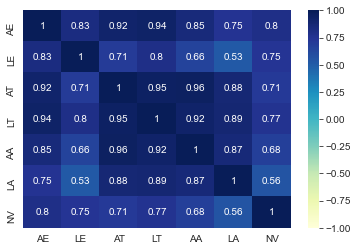

In [64]:
sns.heatmap(data.iloc[:,2:-1].corr(), vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

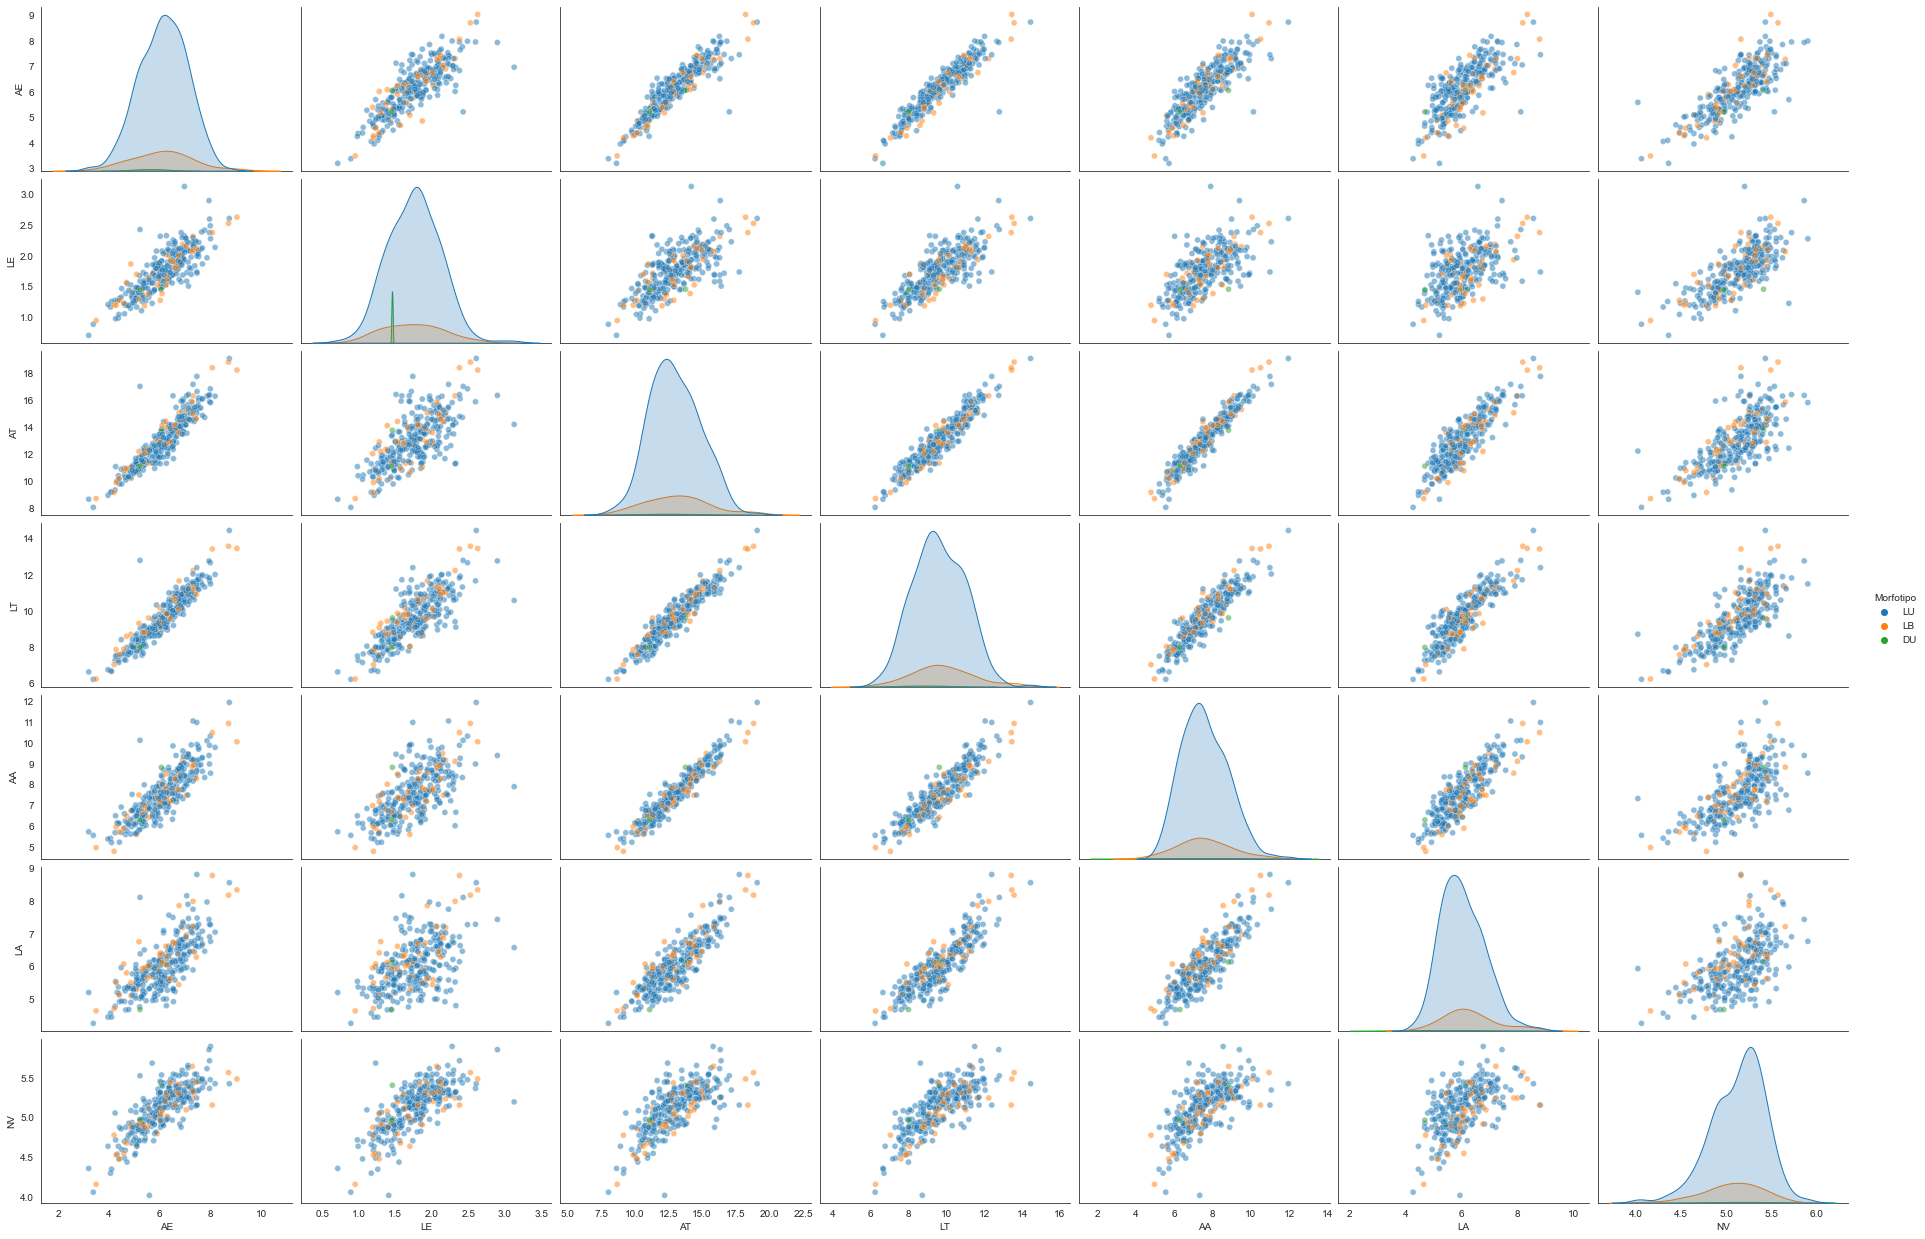

In [65]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

In [66]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

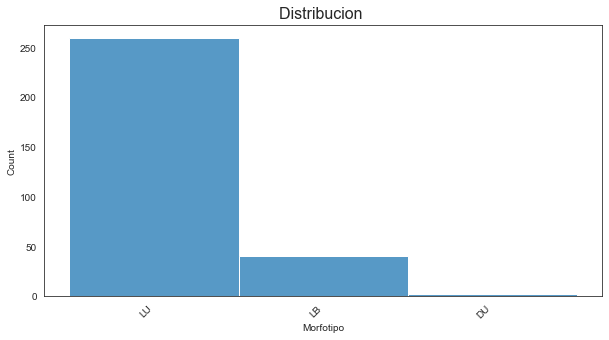

In [67]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

### Recuento por Etiqueta

In [68]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64


### Distribución de las observaciones

array([[<AxesSubplot:title={'center':'AE'}>,
        <AxesSubplot:title={'center':'LE'}>,
        <AxesSubplot:title={'center':'AT'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'LA'}>],
       [<AxesSubplot:title={'center':'NV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

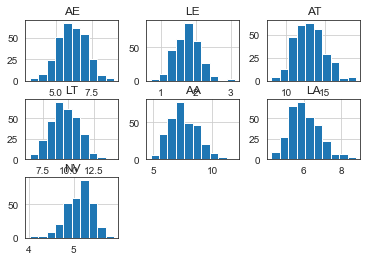

In [69]:
columns = data[["AE","LE","AT","LT","AA","LA","NV"]]
columns.hist()

## Creamos columnas de relación entre variables

In [70]:
data["Ratio_LE_AE"] = data["LE"]/data["AE"]
data["Ratio_LT_AT"] = data["LT"]/data["AT"]
data["Ratio_LA_AA"] = data["LA"]/data["AA"]
data["Ratio_LE_LT"] = data["LE"]/data["LT"]
data["Ratio_AE_AT"] = data["AE"]/data["AT"]
data["Ratio_LA_LT"] = data["LA"]/data["LT"]
data["Ratio_AA_AT"] = data["AA"]/data["AT"]
data["Ratio_LE_LA"] = data["LE"]/data["LA"]
data["Ratio_AE_AA"] = data["AE"]/data["AA"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [71]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.14,1.80,13.72,10.00,8.13,6.08,5.12,LU,1,0.293160,0.728863,0.747847,0.180000,0.447522,0.608000,0.592566,0.296053,0.755228
1,96,6,6.54,2.18,11.66,9.21,6.66,4.93,5.47,LU,0,0.333333,0.789880,0.740240,0.236699,0.560892,0.535288,0.571184,0.442191,0.981982
2,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,0,0.303468,0.762985,0.735115,0.201342,0.506218,0.580058,0.602048,0.347107,0.840826
3,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,0,0.293846,0.761791,0.916272,0.200420,0.519584,0.608604,0.505995,0.329310,1.026856
4,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,1,0.286184,0.729921,0.754941,0.187702,0.478740,0.618123,0.597638,0.303665,0.801054


### Nueva visualización

<AxesSubplot:>

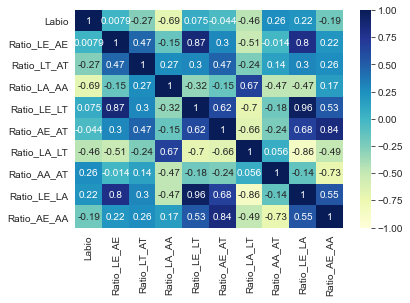

In [72]:
sns.heatmap(data.corr().iloc[9:19,9:19], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

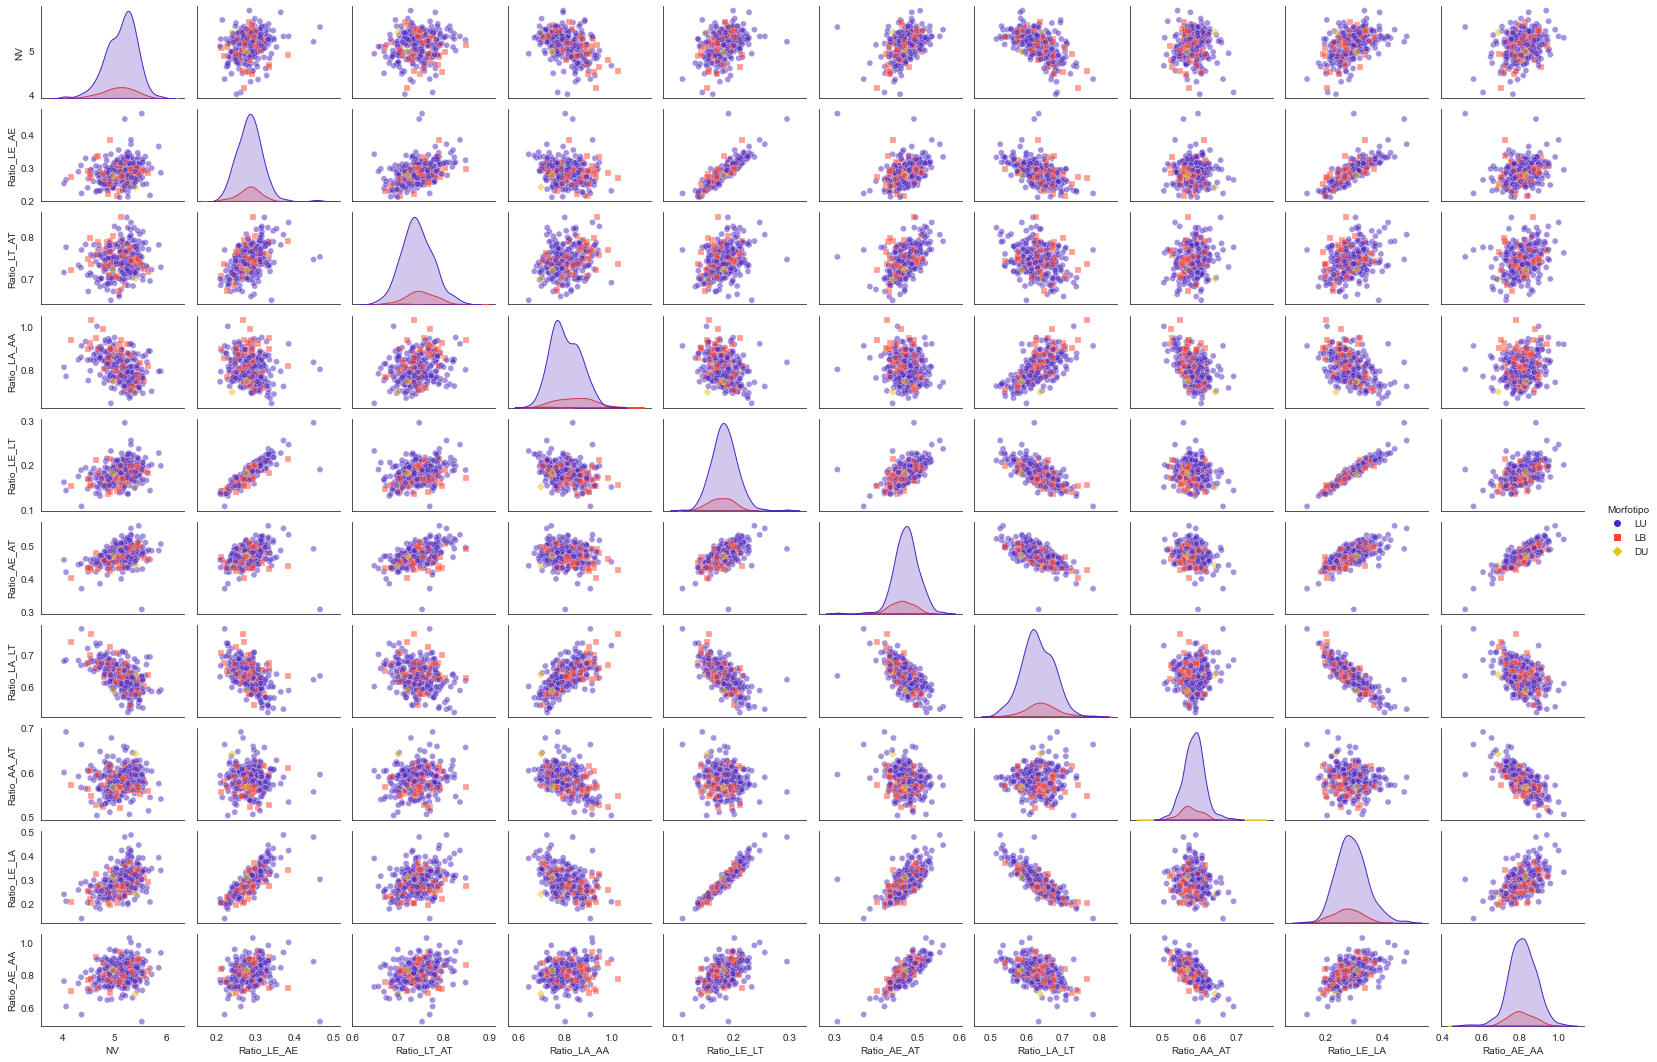

In [73]:
sns.pairplot(data=data,x_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
         y_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

In [74]:
# Guía de Colores Pairplot: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

## Creación Dummies
(creamos dummies de Morfotipo? Es nuestra variable target cuando tenemos el valor)

In [75]:
#data = pd.get_dummies(data=data, columns= ["Morfotipo"], drop_first = True)

In [76]:
#data.head()

In [77]:
#data.shape

## Exportación dataset listo

In [78]:
data.to_csv(r'../data/conchillas_listo.csv', index = False, header=True)